Floodfill algorithm o algoritmo de relleno: Garantiza el camino más corto, despues de varias carreras.
Objetivo: Encontrar un camino entre el punto de partida y el final.

Se compara con derramar agua sobre alguna superficie, en donde queremos que llegue a algún punto,
esta agua fluirá alrededor de las paredes y eventualmente encontrará el punto que se quiere llegar.
Eventualmente, el camino tomado por el agua es el camino más corto valido entre el punto que se 
derrama y donde se quiere llegar.




In [87]:
# Floodfill algorithm o algoritmo de relleno: Garantiza el camino más corto, despues de varias carreras.
# Objetivo: Encontrar un camino entre el punto de partida y el final.

# Se compara con derramar agua sobre alguna superficie, en donde queremos que llegue a algún punto,
# esta agua fluirá alrededor de las paredes y eventualmente encontrará el punto que se quiere llegar.
# Eventualmente, el camino tomado por el agua es el camino más corto valido entre el punto que se 
# derrama y donde se quiere llegar.

# El algoritmo de relleno de inundación se puede implementar de manera recursiva o iterativa.
# La implementación recursiva es más simple, pero tiene la desventaja de que puede fallar con laberintos
# muy grandes, ya que el sistema operativo puede quedarse sin memoria para almacenar las llamadas a la
# función recursiva.

# La implementación iterativa es más compleja, pero no tiene el problema de quedarse sin memoria.

# En este caso se implementa la versión recursiva. 

# Se define una función recursiva que se llama a sí misma hasta que se encuentra la salida del laberinto. 
# La función recursiva se llama a sí misma para cada celda adyacente a la celda actual. 
# Si la celda adyacente es la salida, se devuelve la solución.
# Si la celda adyacente no es la salida, se llama a la función recursiva para esa celda adyacente.

In [88]:
# Importación de las librerías necesarias para el proyecto
# 1. OpenCV para procesamiento de imágenes y tareas de visión por computadora
import cv2

# 2. Numpy para operaciones de matrices y arreglos
import numpy as np

# 3. Matplotlib para visualización y trazado de gráficos y diagramas
import matplotlib.pyplot as plt

# 4. Copy para copiar arreglos y matrices
import copy

In [89]:
# Leyendo la imagen y convirtiendola a escala de grises (0-255)
img = cv2.imread('maze01.jpg', 0)

In [90]:
# Normalizando la imagen para mejorar la detección de bordes
def normalizar_imagen(img):
    img_norm = img

    for i, linea in enumerate(img_norm):
        for j, valor_pixel in enumerate(linea):
            # Si el valor del pixel es mayor a 200, se asigna 1, de lo contrario 0
            if valor_pixel > 200:
                # Asignando 1 a los pixeles blancos (camino)
                img_norm[i][j] = 1
            else:
                # Asignando 0 a los pixeles negros/plomos (paredes)
                img_norm[i][j] = 0

    return img_norm

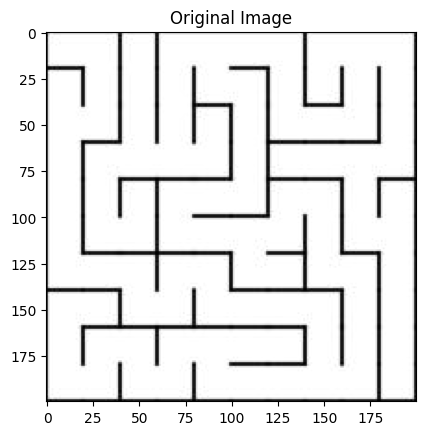

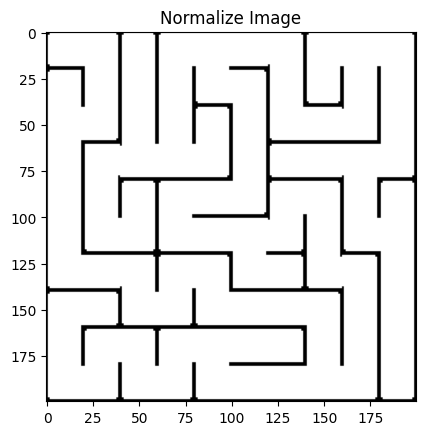

In [91]:
# Muestra la imagen con el título
def mostrar_imagen(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

# Imagen original
mostrar_imagen(img, 'Original Image')

# Normalizando la imagen para mejorar la detección de bordes
imagen_normalizada = normalizar_imagen(img)

# Imagen normalizada
mostrar_imagen(imagen_normalizada, 'Normalize Image')

In [92]:
# Obteniendo el tamaño de la imagen
img.shape

(200, 200)

In [93]:
# Variables globales
# Copia de la imagen normalizada
imagen = copy.deepcopy(imagen_normalizada)

# Define los puntos de inicio y final
inicio = (0,0)
final = (9,9)

# Especifica el tamaño de cada celda en la cuadrícula creada en la imagen
tamaño_celda = 20

# Marca para los puntos de inicio y final
marca = 2
# Relleno para crear una cuadrícula en la imagen
# padding = 10

# Define los movimientos posibles en la imagen (abajo, arriba, derecha, izquierda)
movimientos = [(1,0),(-1,0),(0,1),(0,-1)]

# Calcula de tamaño total de la imagen en coordenadas (filas, columnas)
total_coordenadas = (imagen.shape[0]//tamaño_celda,imagen.shape[1]//tamaño_celda)

# Inicializamos una matriz de ceros para almacenar el camino trazado en la imagen (filas, columnas)
camino_trazado = np.zeros(total_coordenadas)
# Crea una matriz para almacenar el número asociado con cada celda en la imagen (filas, columnas)
numero_matriz = np.zeros(total_coordenadas)

# Inicializamos una matriz para almacenar el número de cada celda en la imagen (filas, columnas)
numero_id = np.zeros(total_coordenadas)

In [94]:
# Define una función para representar una celda en la imagen
def procesamiento_celdas(img, coordinate, fill=None, impresion_ruta=False, padding=4):

    # Obtiene la posición actual en la imagen (fila, columna)
    posicion_actual = tuple(map(lambda x:x*tamaño_celda, coordinate))

    # si fill es None, se devuelve la imagen en la posición actual con el tamaño de la celda, sin rellenar
    # esto se usa para obtener la imagen de la celda en la posición actual
    if fill is None:
        return img[posicion_actual[0]:posicion_actual[0]+tamaño_celda, posicion_actual[1]:posicion_actual[1]+tamaño_celda]
    
    # si path_print es True, rellena la celda con el valor fill
    # este se usa para marcar el camino trazado por el algoritmo en la imagen final del laberinto resuelto
    if impresion_ruta:
        img[posicion_actual[0]+padding:posicion_actual[0]+tamaño_celda-padding, posicion_actual[1]+padding:posicion_actual[1]+tamaño_celda-padding] = fill
    else:
        # En la posición actual de las coordenadas, se asigna el valor fill.
        # Esto indica que en las ubicaciones específicas de la matriz traced_path, se asigna el valor fill.
        # Esto indica que esa área ha sido visitada por el algoritmo.
        # Este se usa para marcar todas las celdas visitadas por el algoritmo en la imagen final del laberinto resuelto
        print('fill: '+ str(fill))
        camino_trazado[coordinate[0], coordinate[1]] = fill

In [95]:
# Define una función para encontrar las direcciones disponibles desde la celda actual
# La función toma la imagen y la posición actual como parámetros y devuelve una lista de direcciones disponibles desde la celda actual
# La función verifica el centro de la celda actual y devuelve las direcciones disponibles
# Si el centro de la celda actual está bloqueado, devuelve una lista vacía

def encontrar_direccion(actual):
    direccion = []
    TAMAÑO_CELDA = tamaño_celda

    # Abajo
    # Verificar el centro hacia abajo en busca de celdas con valor 0 (CELL_SIZE//2:,CELL_SIZE//2)
    if 0 not in actual[TAMAÑO_CELDA//2:,TAMAÑO_CELDA//2]:
        direccion.append(0)
        
     # Arriba
    # Verificar el centro hacia arriba en busca de celdas con valor 0 (:CELL_SIZE//2,CELL_SIZE//2)
    if 0 not in actual[:TAMAÑO_CELDA//2, TAMAÑO_CELDA//2]:
        direccion.append(1)
    
    # Derecha
    # Verificar el centro hacia la derecha en busca de celdas con valor 0 (CELL_SIZE//2,CELL_SIZE//2:)
    if 0 not in actual[TAMAÑO_CELDA//2, TAMAÑO_CELDA//2:]:
        direccion.append(2)
    # Izquierda
    # Verificar el centro hacia la izquierda en busca de celdas con valor 0 (CELL_SIZE//2:,:CELL_SIZE//2)
    if 0 not in actual[TAMAÑO_CELDA//2, :TAMAÑO_CELDA//2]:
        direccion.append(3)

    return direccion

In [96]:
# Función de inundación para encontrar el camino desde el punto de inicio hasta el punto final en la imagen (función recursiva)
def inundacion(img, coordenada, marca, inicio):
    
    # Obtenemos la celda actual en la imagen
    # Si fill es None, se devuelve la imagen en la posición actual con el tamaño de la celda, sin rellenar
    current = procesamiento_celdas(img, coordenada)
    
    # Si la celda actual contiene un 1 y no ha sido marcada o si la celda actual es el punto de inicio se marca la celda actual
    # Esto se usa para marcar todas las celdas visitadas por el algoritmo en la imagen final del laberinto resuelto
    if((1 in current)and((camino_trazado[coordenada[0],coordenada[1]]>marca)or(camino_trazado[coordenada[0],coordenada[1]]==0))):
        print("Marca la celda actual")
        procesamiento_celdas(img, coordenada, marca)
    else:
        # Si no se encuentra una celda válida, se devuelve 1 para indicar que no hay camino posible desde la celda actual
        # Esto se usa para retroceder en la función recursiva hasta encontrar una celda válida
        print("No marca la celda actual")
        return 1
    
    # Busca las direcciones disponibles desde la celda actual
    direccion = encontrar_direccion(current)
    
     # Llamar recursivamente a la función flood para explorar las direcciones disponibles
     # Si la función flood devuelve 1, significa que la celda actual no es válida y se retrocede en la función recursiva
     # Si la función flood devuelve 0, significa que la celda actual es válida y se avanza en la función recursiva
     # 
    for i in direccion:
        print('cordenada actual: '+ str(coordenada))

        print('direcciones disponibles: '+ str(direccion))
        print('direccion: '+ str(i))

        if(str(movimientos[i][0])+','+str(movimientos[i][1]) == '1,0'):
            print('movimiento: abajo')
        elif(str(movimientos[i][0])+','+str(movimientos[i][1]) == '-1,0'):
            print('movimiento: arriba')
        elif(str(movimientos[i][0])+','+str(movimientos[i][1]) == '0,1'):
            print('movimiento: derecha')
        elif(str(movimientos[i][0])+','+str(movimientos[i][1]) == '0,-1'):
            print('movimiento: izquierda')
            
        print('coordenada siguiente: '+ str((coordenada[0]+movimientos[i][0],coordenada[1]+movimientos[i][1])))
        print(' ')
        
        inundacion(img,(coordenada[0]+movimientos[i][0],coordenada[1]+movimientos[i][1]),marca+1,inicio)

In [97]:
# Haciendo una copia de la imagen original
nueva_imagen = copy.deepcopy(imagen_normalizada)

# Llamando a la función flood para encontrar el camino desde el punto de inicio hasta el punto final en la imagen
inundacion(nueva_imagen, final, marca, inicio)

Marca la celda actual
fill: 2
cordenada actual: (9, 9)
direcciones disponibles: [1]
direccion: 1
movimiento: arriba
coordenada siguiente: (8, 9)
 
Marca la celda actual
fill: 3
cordenada actual: (8, 9)
direcciones disponibles: [0, 1]
direccion: 0
movimiento: abajo
coordenada siguiente: (9, 9)
 
No marca la celda actual
cordenada actual: (8, 9)
direcciones disponibles: [0, 1]
direccion: 1
movimiento: arriba
coordenada siguiente: (7, 9)
 
Marca la celda actual
fill: 4
cordenada actual: (7, 9)
direcciones disponibles: [0, 1]
direccion: 0
movimiento: abajo
coordenada siguiente: (8, 9)
 
No marca la celda actual
cordenada actual: (7, 9)
direcciones disponibles: [0, 1]
direccion: 1
movimiento: arriba
coordenada siguiente: (6, 9)
 
Marca la celda actual
fill: 5
cordenada actual: (6, 9)
direcciones disponibles: [0, 1]
direccion: 0
movimiento: abajo
coordenada siguiente: (7, 9)
 
No marca la celda actual
cordenada actual: (6, 9)
direcciones disponibles: [0, 1]
direccion: 1
movimiento: arriba
co

[[62. 61. 30. 23. 22. 21. 20. 15. 14. 13.]
 [59. 60. 29. 24. 23. 24. 19. 16. 15. 12.]
 [58. 59. 28. 25. 28. 25. 18. 17. 16. 11.]
 [57. 28. 27. 26. 27. 26. 11. 10.  9. 10.]
 [56. 29. 32. 29. 28. 27. 34. 35.  8.  7.]
 [55. 30. 31. 30. 31. 32. 33. 36.  7.  6.]
 [54. 53. 52. 49. 48. 33. 34. 37. 38.  5.]
 [55. 56. 51. 50. 47. 46. 45. 44. 39.  4.]
 [54. 51. 50. 47. 46. 47. 48. 43. 40.  3.]
 [53. 52. 49. 48. 45. 44. 43. 42. 41.  2.]]


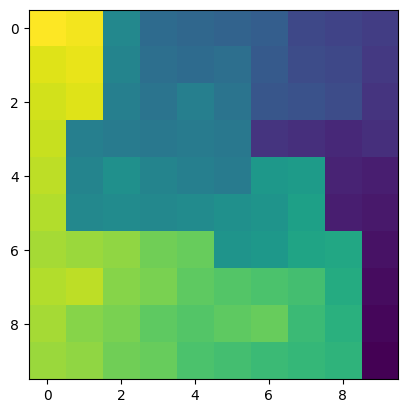

In [98]:
# Mostrar la imagen con todos los caminos trazados por el algoritmo
print(camino_trazado)
plt.imshow(camino_trazado)

In [99]:
# Función para trazar el camino desde el punto de inicio hasta el punto final en la imagen
def trazar(img, coordenada, final, camino):
    # Si la coordenada actual es igual a la coordenada final, se devuelve el camino
    if coordenada == final:
        return camino

    dire = []
    dirc = []
    
    # Obtiene la celda actual en la imagen
    actual = procesamiento_celdas(img, coordenada)
    
    # Encuentra las direcciones disponibles desde la celda actual 
    direction = encontrar_direccion(actual)

    # Encuentra las direcciones disponibles desde la celda actual
    for i in direction:
        try:
            # Si la celda actual ya ha sido visitada, 
            # no se considera para encontrar la dirección mínima disponible desde la celda actual
            element=camino_trazado[coordenada[0]+movimientos[i][0],coordenada[1]+movimientos[i][1]]
            if element==0:
                continue
            
            # Si la celda actual no ha sido visitada, 
            # se considera para encontrar la dirección mínima disponible desde la celda actual
            if ((coordenada[0]+movimientos[i][0]>=0)and(coordenada[1]+movimientos[i][1]>=0)):
                # Se almacena la dirección y el valor de la celda en la dirección en la lista dire y dirc
                dire.append(element)
                dirc.append(i)
        except:
            pass

    # Encuentra la dirección mínima
    dirmin = min(dire)
    
    # Encuentra el índice de la dirección mínima
    indice = dire.index(dirmin)

    # Agrega la coordenada actual a la lista de path (camino)
    camino.append((coordenada[0]+movimientos[dirc[indice]][0],coordenada[1]+movimientos[dirc[indice]][1]))

    # Llamar recursivamente a la función trace para encontrar el camino desde el punto de inicio hasta el punto final en la imagen
    return trazar(img,(coordenada[0]+movimientos[dirc[indice]][0],coordenada[1]+movimientos[dirc[indice]][1]),final,camino)

In [100]:
# Inicializamos el camino con el punto de inicio
camino = [inicio]

# Haciendo una copia de la imagen original
nueva_imagen = copy.deepcopy(imagen_normalizada)

# Llamando a la función para trazar el camino desde el punto de inicio hasta el punto final en la imagen
camino = trazar(nueva_imagen, inicio, final, camino)

61.0
60.0
62.0
59.0
61.0
60.0
58.0
57.0
59.0
59.0
56.0
58.0
55.0
57.0
54.0
56.0
55.0
53.0
52.0
54.0
51.0
53.0
52.0
50.0
49.0
51.0
50.0
48.0
47.0
49.0
48.0
46.0
45.0
47.0
44.0
46.0
43.0
45.0
42.0
44.0
43.0
41.0
43.0
40.0
42.0
41.0
39.0
40.0
38.0
39.0
37.0
36.0
38.0
37.0
35.0
36.0
34.0
33.0
35.0
34.0
32.0
33.0
33.0
31.0
32.0
30.0
29.0
31.0
30.0
28.0
27.0
29.0
26.0
28.0
27.0
25.0
26.0
24.0
25.0
23.0
22.0
24.0
23.0
21.0
23.0
20.0
22.0
19.0
21.0
18.0
20.0
19.0
17.0
16.0
18.0
15.0
17.0
16.0
14.0
15.0
13.0
15.0
12.0
14.0
11.0
13.0
10.0
12.0
11.0
9.0
8.0
10.0
10.0
7.0
9.0
8.0
6.0
5.0
7.0
7.0
4.0
6.0
3.0
5.0
2.0
4.0


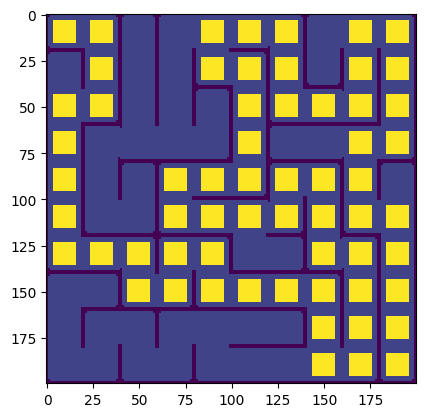

In [101]:
# Crear una copia de la imagen original
img_path_show = copy.deepcopy(imagen_normalizada)

# Marcar el camino trazado por el algoritmo en la imagen final del laberinto resuelto
for i,j in enumerate(camino):
    # Agrega un fill de 5 para marcar el camino trazado por el algoritmo en la imagen final del laberinto resuelto
    procesamiento_celdas(img_path_show,j,5,True)
    
# Mostrar la imagen final del laberinto resuelto con el camino trazado por el algoritmo
plt.imshow(img_path_show, interpolation='none')